In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


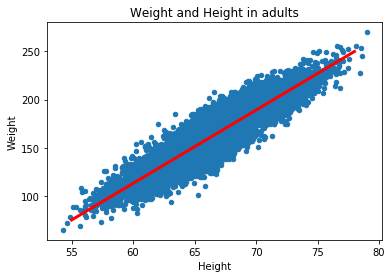

In [6]:
def plot_humans():
    df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')

plot_humans()
# Here we're plotting the red line 'by hand' with fixed values
# we'll try to learn this line with an algorithm below
plt.plot([55, 78], [75,250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x*w+b

In [8]:
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

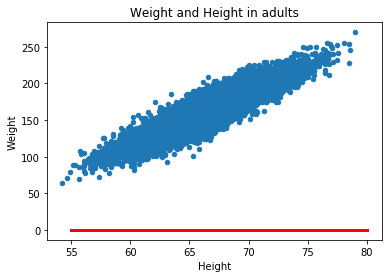

In [10]:
plot_humans()
plt.plot(x, yhat, color='red', linewidth=3)

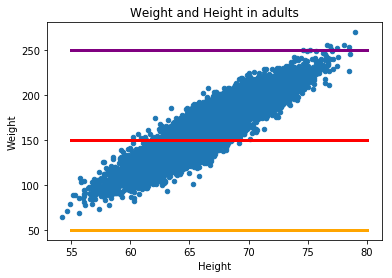

In [11]:
plot_humans()
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='purple', linewidth=3)

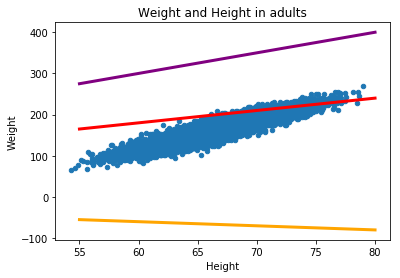

In [13]:
plot_humans()
plt.plot(x, line(x, w=5), color='purple', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3)

In [15]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [16]:
X = df[['Height']].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [17]:
X.shape

(10000, 1)

In [19]:
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [20]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [21]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

In [22]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.1224504786412

In [23]:
y_pred = line(X, w=2, b=20)
mean_squared_error(y_true, y_pred.ravel())

708.9129575511095

Text(0.5,0,'b')

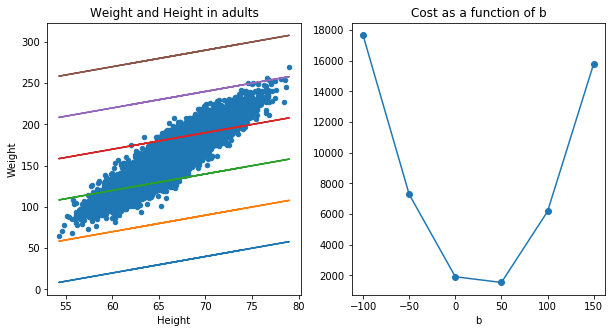

In [24]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = [] # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

/home/ru7/.virtualenv/testbed/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [26]:
model = Sequential()

In [27]:
model.add(Dense(1, input_shape=(1,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [29]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 37us/step - loss: 1364.1191
Epoch 2/40
10000/10000 [==============================] - 0s 30us/step - loss: 576.0521
Epoch 3/40
10000/10000 [==============================] - 0s 31us/step - loss: 527.9933
Epoch 4/40
10000/10000 [==============================] - 0s 30us/step - loss: 503.5136
Epoch 5/40
10000/10000 [==============================] - 0s 30us/step - loss: 452.9782
Epoch 6/40
10000/10000 [==============================] - 0s 32us/step - loss: 417.0966
Epoch 7/40
10000/10000 [==============================] - 0s 31us/step - loss: 370.0082
Epoch 8/40
10000/10000 [==============================] - 0s 33us/step - loss: 356.8280
Epoch 9/40
10000/10000 [==============================] - 0s 30us/step - loss: 309.6202
Epoch 10/40
10000/10000 [==============================] - 0s 31us/step - loss: 292.9852
Epoch 11/40
10000/10000 [==============================] - 0s 30us/step - loss: 257.3327
Epoch 12/40
10000/10000 [====

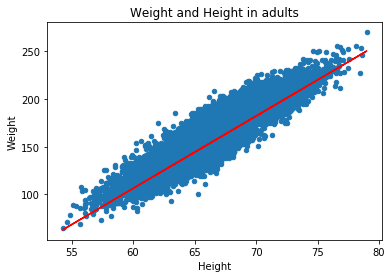

In [30]:
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [31]:
W, B = model.get_weights()
W

array([[7.5781193]], dtype=float32)

In [32]:
B

array([-348.33243], dtype=float32)